**Import Libraries**

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [ ]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (9).csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df_copy = df.copy()


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

print("\nColumn details:")
print(df.info())

Number of rows: 5110
Number of columns: 12

Column details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


**Data Preprocessing**

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Replacing The Missing Values with Mean**

In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

**Dropping Unnecessary Columns**

In [ ]:
if 'id' in df.columns:
    df.drop(columns=['id'], axis=1, inplace=True)
else:
    print("Column 'id' not found in DataFrame")
df

Column 'id' not found in DataFrame


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


**Encoding Categorical Variables**

In [ ]:
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [ ]:
print('work_type : ', df['work_type'].unique())
print('gender : ', df['gender'].unique())
print('Residence_type : ', df['Residence_type'].unique())
print('ever"_married : ', df['ever_married'].unique())
print('smoking_status : ', df['smoking_status'].unique())

work_type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender :  ['Male' 'Female' 'Other']
Residence_type :  ['Urban' 'Rural']
ever"_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
smoking_status = le.fit_transform(df['smoking_status'])
gender = le.fit_transform(df['gender'])
ever_married = le.fit_transform(df['ever_married'])
Residence_type = le.fit_transform(df['Residence_type'])
work_type = le.fit_transform(df['work_type'])

In [ ]:
df['work_type'] = work_type
df['gender'] = gender
df['Residence_type'] = Residence_type
df['ever_married'] = ever_married
df['smoking_status'] = smoking_status

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
df.nunique()

,0
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,419
smoking_status,4


**Exploratory Data Analysis**

Correlation Heatmap

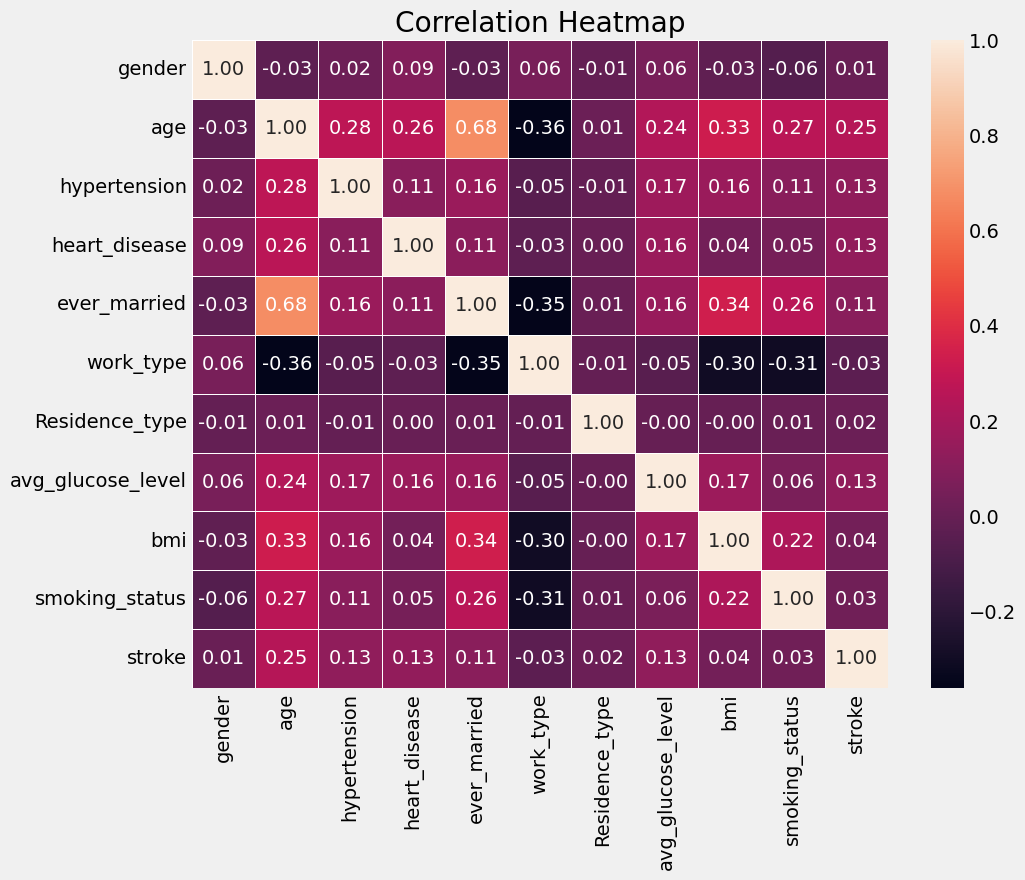

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Univariate Analysis

In [ ]:
print(df['gender'].value_counts())
print(df['work_type'].value_counts())
print(df['Residence_type'].value_counts())
print(df['ever_married'].value_counts())
print(df['smoking_status'].value_counts())
print(df['hypertension'].value_counts())
print(df['heart_disease'].value_counts())

gender
0    2994
1    2115
2       1
Name: count, dtype: int64
work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64
Residence_type
1    2596
0    2514
Name: count, dtype: int64
ever_married
1    3353
0    1757
Name: count, dtype: int64
smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64


In [ ]:
print(dataset['gender'].value_counts())
print(dataset['work_type'].value_counts())
print(dataset['Residence_type'].value_counts())
print(dataset['ever_married'].value_counts())
print(dataset['smoking_status'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [ ]:
gender = {"Female" : [2994], "Male" : [2115], "Other" : [1]}
wt = {"Private" : [2925], "Self-employed" : [819], "Children" : [687],'Govt job': [657], 'Never worked' : [22]}
rt = {"Urban" : [2596], "Rural" : [2514]}
evermarried = {"Yes" : [3353], "No" : [1757]}
smoke = {"Never smoked " : [1892], "Formerly smoked" : [885], "Smokes" : [789],"Unknown" : [1544]}
bp =  {"Yes " : [498], "No" : [4612]}
heartdisease= {"Yes " : [276], "No" : [4834]}
stroke = {"Yes " : [249], "No" : [4861]}

Gender Analysis

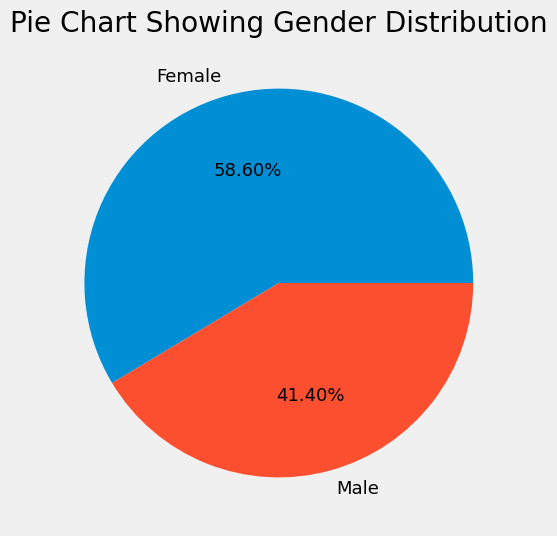

In [ ]:
plt.figure(figsize = (6, 6))
temp = [2994,2115]
labels = ['Female','Male']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie Chart Showing Gender Distribution')
plt.show()

Analysis of Residence Type

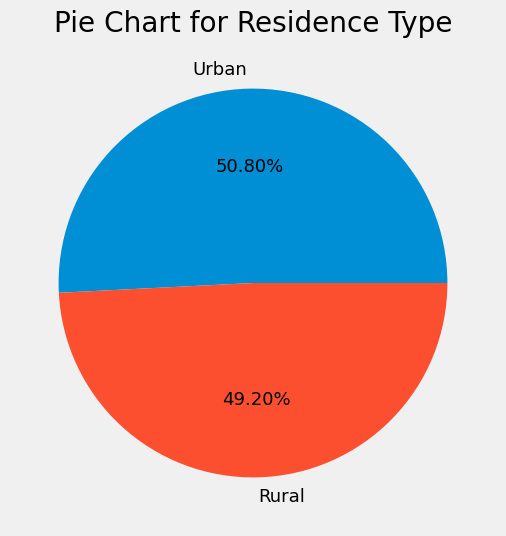

In [ ]:
plt.figure(figsize = (6, 6))
temp = [2596,2514]
labels = ['Urban','Rural']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', textprops=textprops)
plt.title('Pie Chart for Residence Type')
plt.show()

Analysis of Ever Married

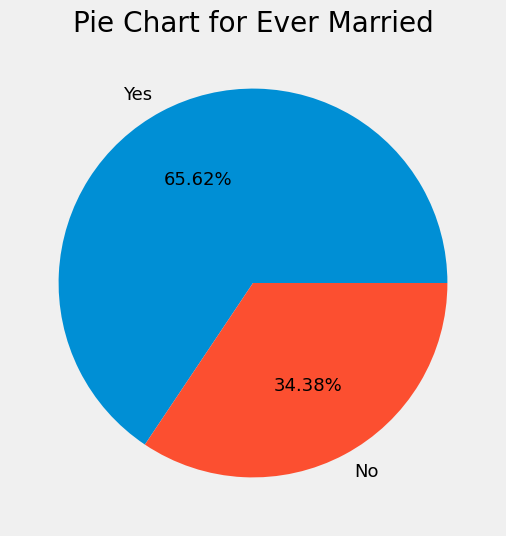

In [ ]:
plt.figure(figsize = (6, 6))
temp = [3353,1757]
labels = ['Yes','No']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie Chart for Ever Married')
plt.show()

Work Type Analysis

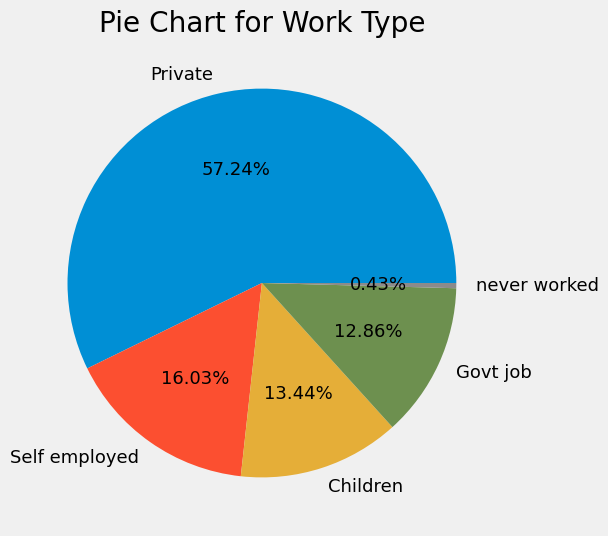

In [ ]:
plt.figure(figsize=(6,6))
wt1 = [2925,819,687, 657, 22]
textprops = {"fontsize":13}
plt.pie(wt1,labels=['Private','Self employed', 'Children','Govt job','never worked'], autopct='%1.2f%%',textprops=textprops)
plt.title('Pie Chart for Work Type')
plt.show()

Smoking Status Analysis

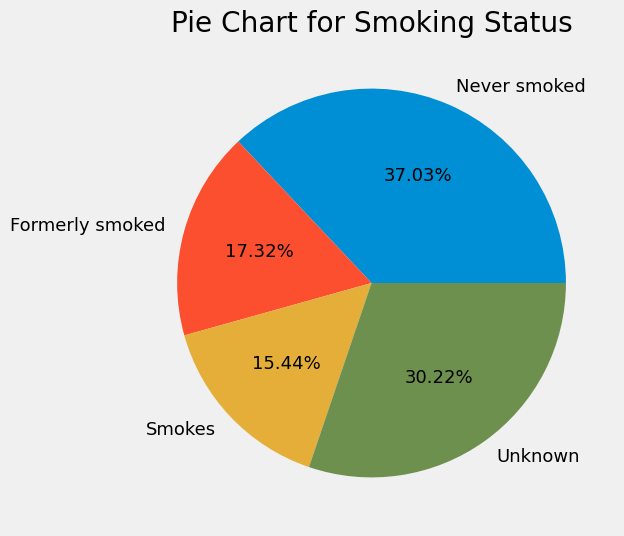

In [ ]:
plt.figure(figsize = (6, 6))
temp = [1892,885,789,1544]
labels = ['Never smoked','Formerly smoked', 'Smokes','Unknown']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie Chart for Smoking Status')
plt.show()

Graphs for Heart Disease and Hypertension

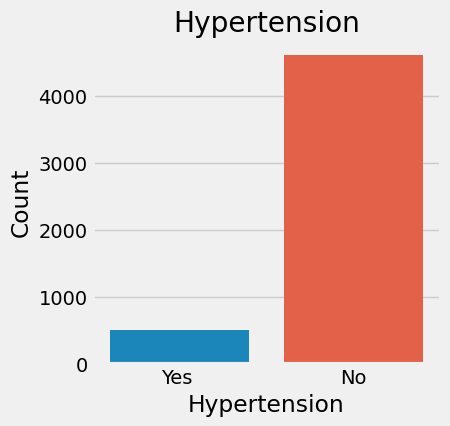

In [ ]:
bp = pd.DataFrame(data= bp)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=bp)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title("Hypertension")
plt.show()

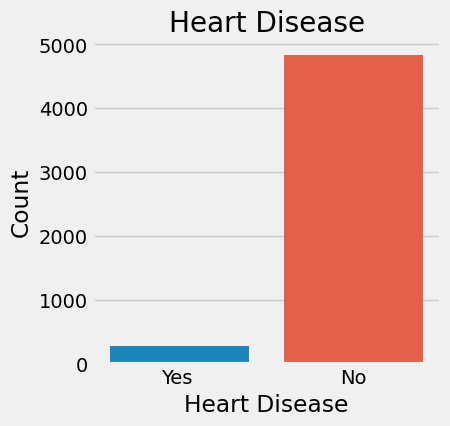

In [ ]:
heartdisease = pd.DataFrame(data= heartdisease)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=heartdisease)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title("Heart Disease")
plt.show()

Bivariate Analysis

Age, BMI, Average Glucose Level vs Stroke

Text(0.5, 1.0, 'Age vs Stroke')

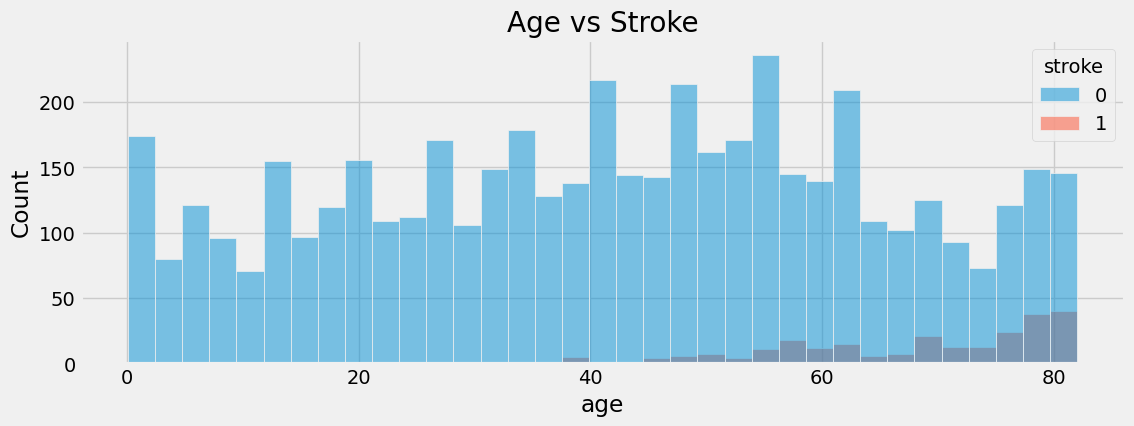

In [ ]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=df, hue='stroke', bins=35) # Changed 'data' to 'df'
pl.set_title('Age vs Stroke')

Text(0.5, 1.0, 'Average Glucose Level vs Stroke')

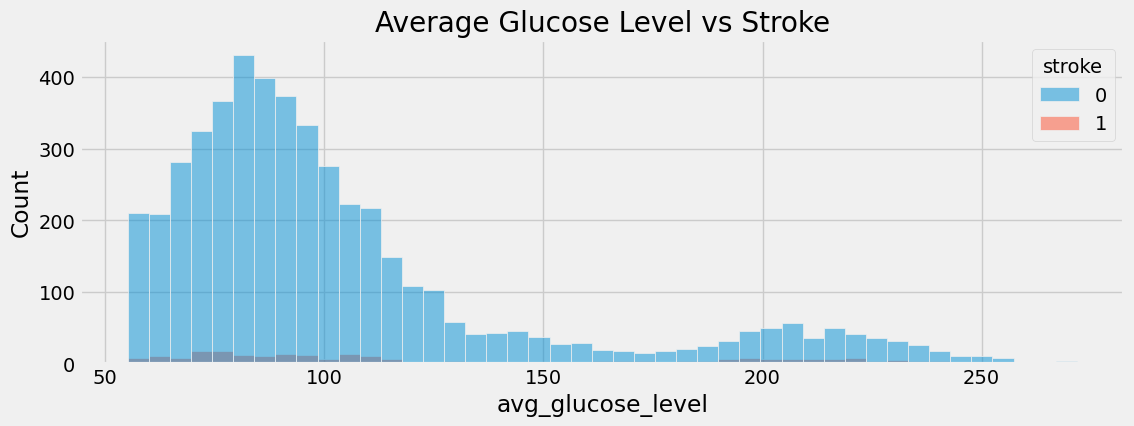

In [ ]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=df, hue='stroke', bins=45) # Changed 'data' to 'df'
pl.set_title('Average Glucose Level vs Stroke')

Text(0.5, 1.0, 'Stroke vs BMI')

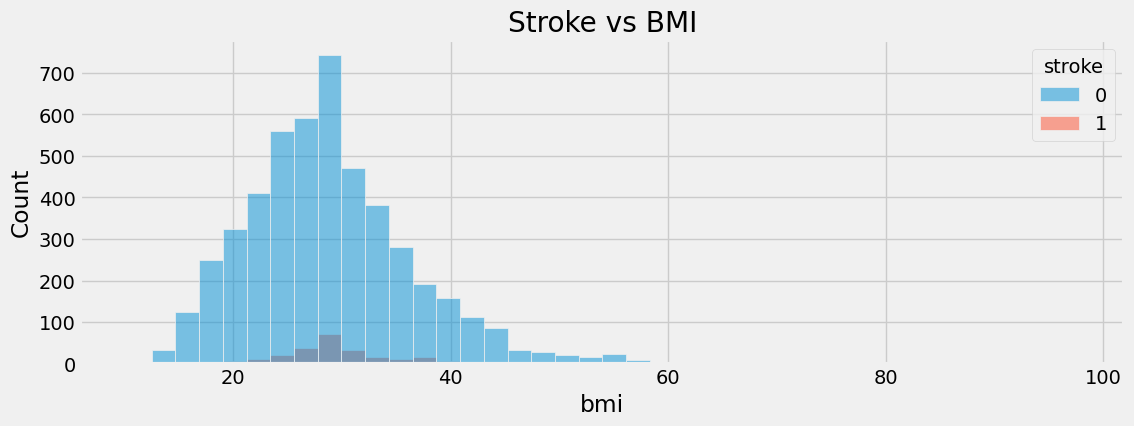

In [ ]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=df, hue='stroke', bins=40)
pl.set_title('Stroke vs BMI')

Countplots

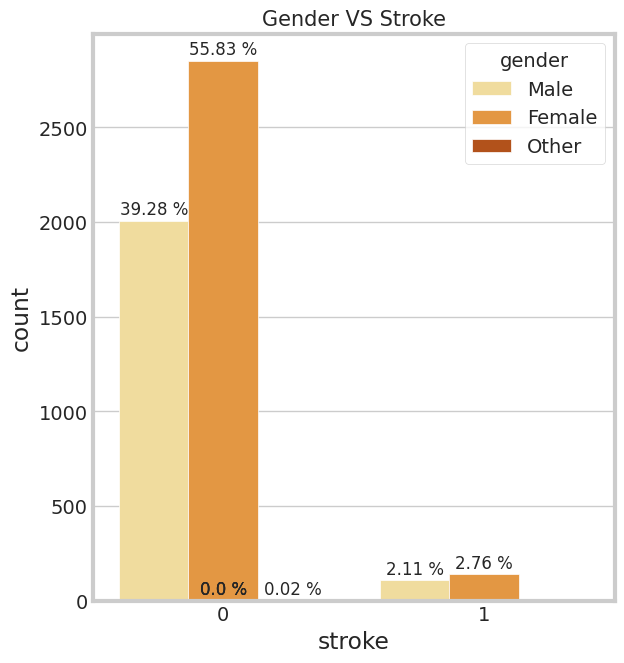

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (6,7))

ax=sns.countplot(x=dataset['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

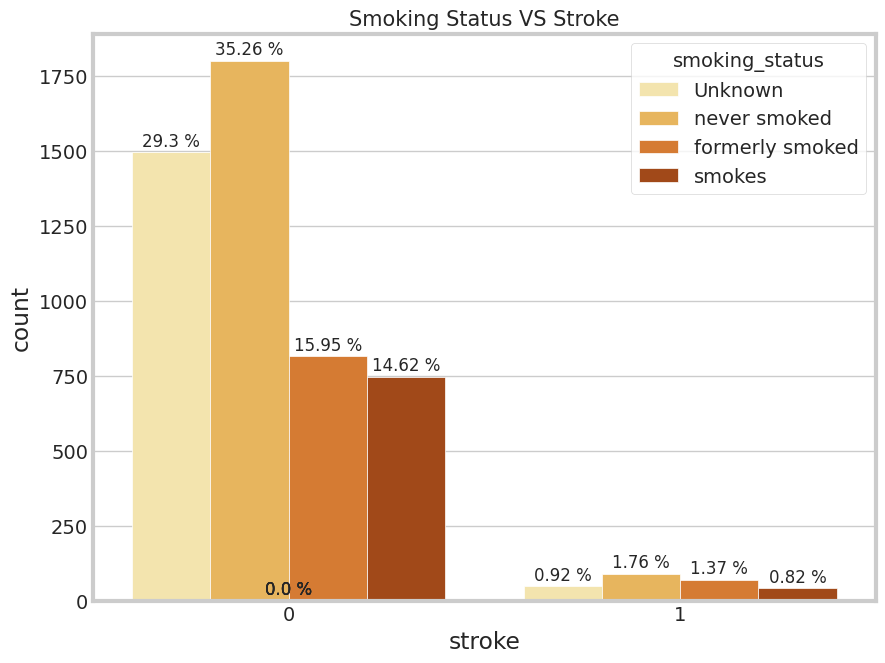

In [ ]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['smoking_status'],palette = 'YlOrBr',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

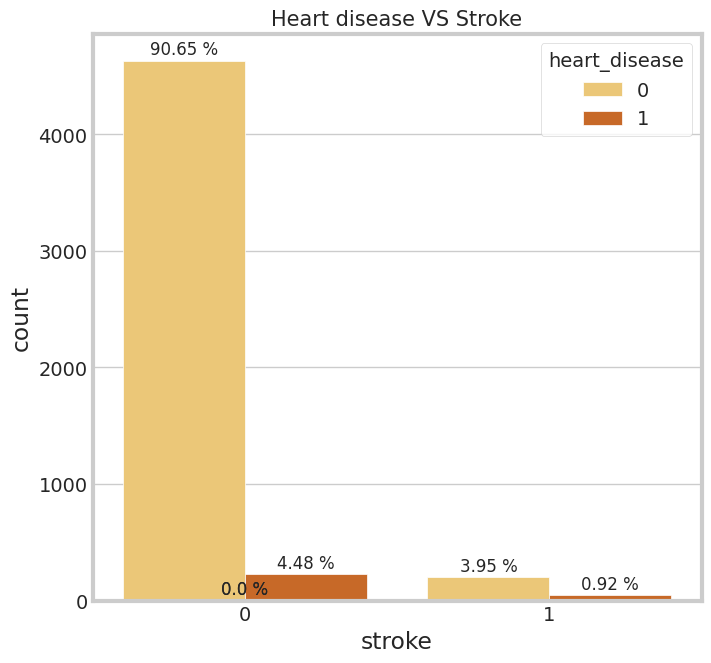

In [ ]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['heart_disease'],palette = 'YlOrBr')
ax.set_title("Heart disease VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Residence Type VS Stroke')

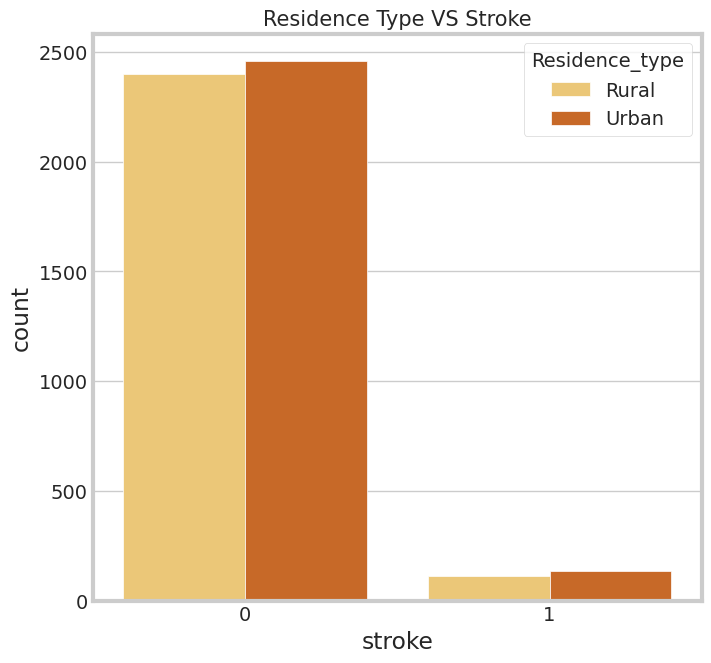

In [ ]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['Residence_type'],palette = 'YlOrBr')
ax.set_title("Residence Type VS Stroke",fontsize = 15)

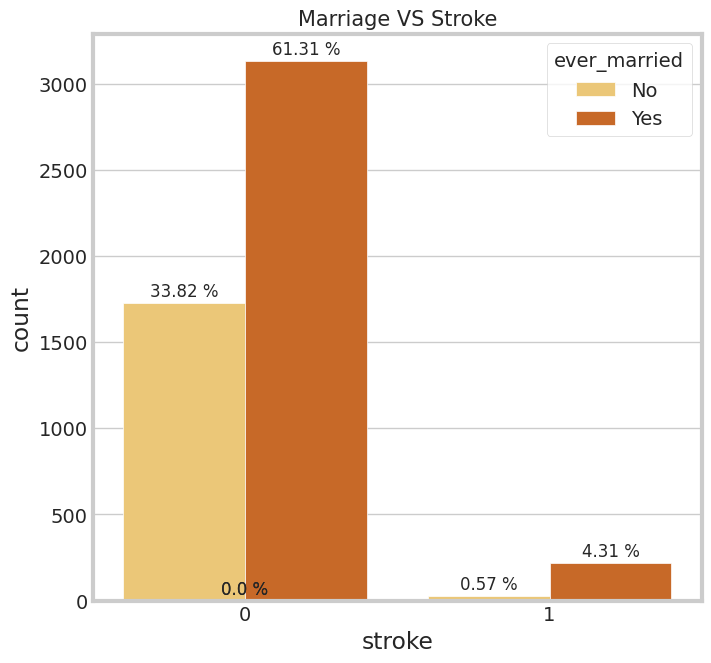

In [ ]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['ever_married'],palette = 'YlOrBr')
ax.set_title("Marriage VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

Exploring Need for Oversampling

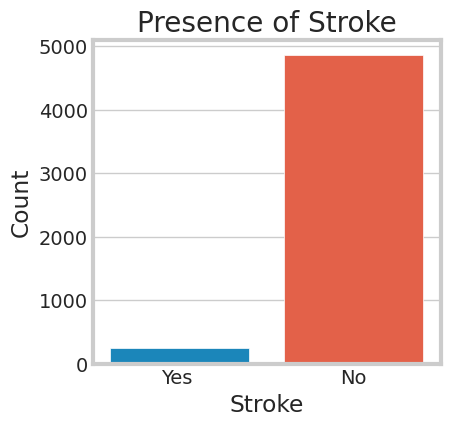

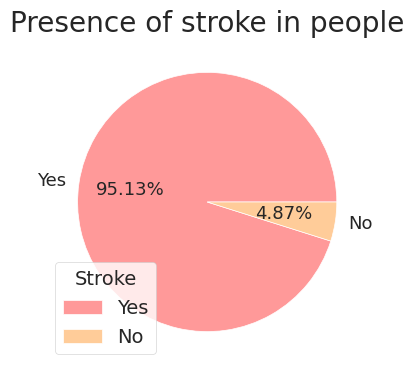

In [ ]:
stroke = pd.DataFrame(stroke)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=stroke)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Presence of Stroke")
plt.show()


plt.figure(figsize = (4, 4))
temp = [4861,249]
labels = ['Yes','No']
colors = ['#ff9999','#ffcc99']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', colors = colors,textprops = textprops )
plt.title('Presence of stroke in people')
plt.legend(title = "Stroke")
plt.show()

In [ ]:
print((df['stroke']).value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
print("The number of positive cases is : 249")
print("The number of negative cases is : 4861")
print("The percentage of positive cases is :", 249/5110*100)

The number of positive cases is : 249
The number of negative cases is : 4861
The percentage of positive cases is : 4.87279843444227


**Training and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'stroke' is the target variable
X1 = df.drop('stroke', axis=1)  # Features
Y1 = df['stroke']  # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=105)

In [ ]:
Y_train.value_counts()

,count
stroke,
0,3892
1,196


**Model Training**

Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(Y_test,Y_pred_NB)
print(NB_accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_pred_NB)
print("\nConfusion Matrix: \n", CM)

86.69275929549902 %

Confusion Matrix: 
 [[861 108]
 [ 28  25]]


In [ ]:
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       969
           1       0.19      0.47      0.27        53

    accuracy                           0.87      1022
   macro avg       0.58      0.68      0.60      1022
weighted avg       0.93      0.87      0.89      1022



In [ ]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

specificity = 0.8885448916408669


In [ ]:
y_score_NB = NB.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score_NB)
print('roc_auc_score for Gaussian Naive Bayes: ', roc_auc_score(Y_test, y_score_NB))

roc_auc_score for Gaussian Naive Bayes:  0.8548980664758454


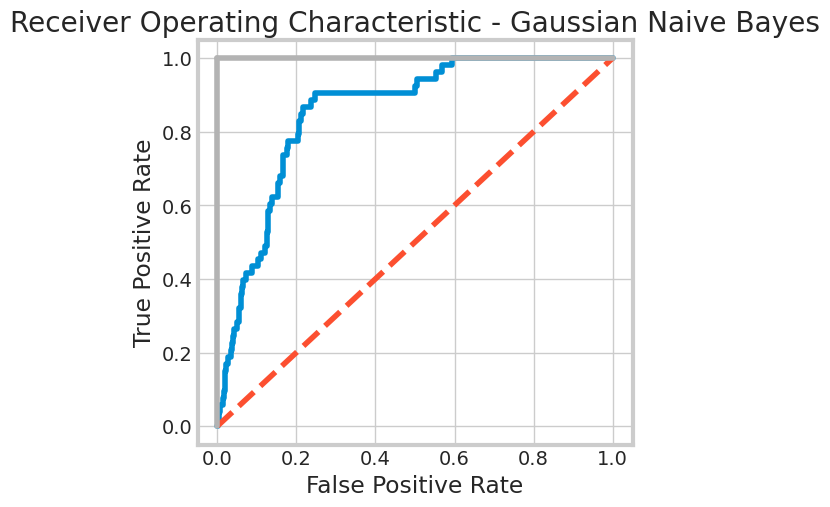

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Gaussian Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**KNN**

In [ ]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,Y_train)
Y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_Res_KNN)
print(KNN_Accuracy*100,'%')

94.12915851272015 %


In [ ]:
CM = confusion_matrix(Y_test, Y_Res_KNN)
print(CM)

[[962   7]
 [ 53   0]]


In [ ]:
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])
print(classification_report(Y_test, Y_Res_KNN))

True Positives :  0
True Negatives :  962
False Positives :  7
False Negatives :  53
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       969
           1       0.00      0.00      0.00        53

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.90      0.94      0.92      1022



In [ ]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

specificity = 0.9927760577915377


In [ ]:
y_score_KNN = KNN_clf.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, y_score_KNN)
print('roc_auc_score for K Nearest Neighbour is: ', roc_auc_score(Y_test, y_score_KNN))

roc_auc_score for K Nearest Neighbour is:  0.6912397531008432


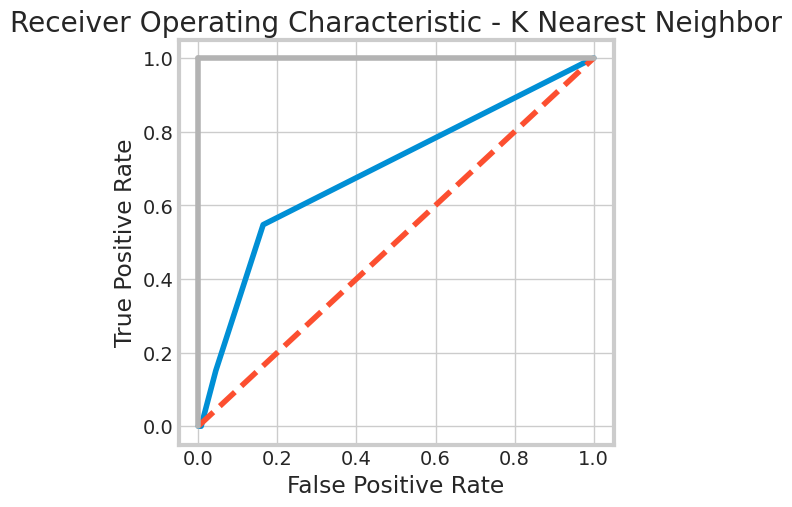

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - K Nearest Neighbor')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Model Evaluation**

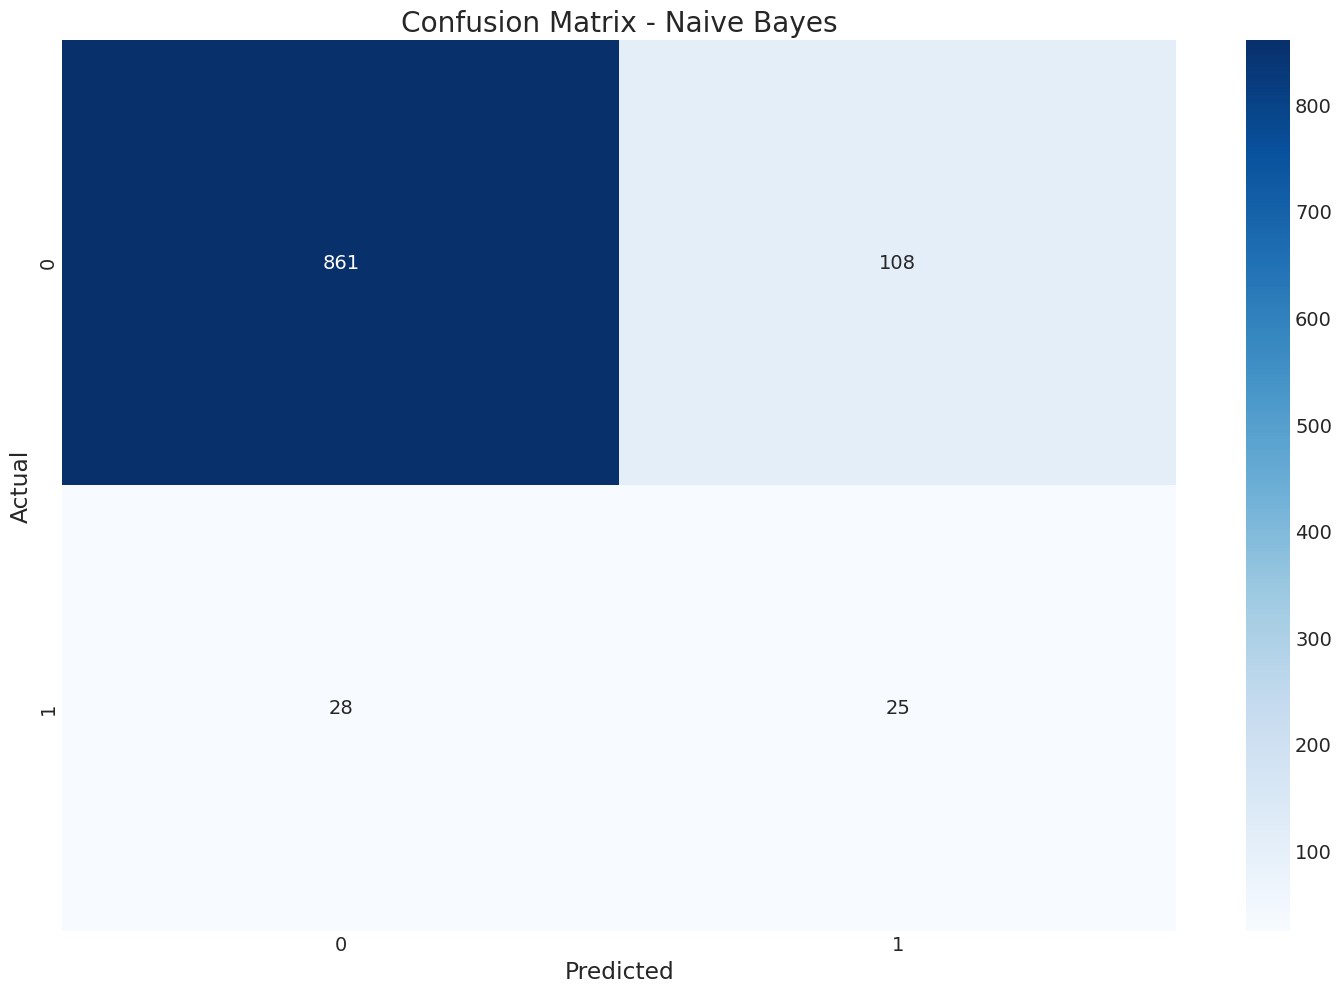

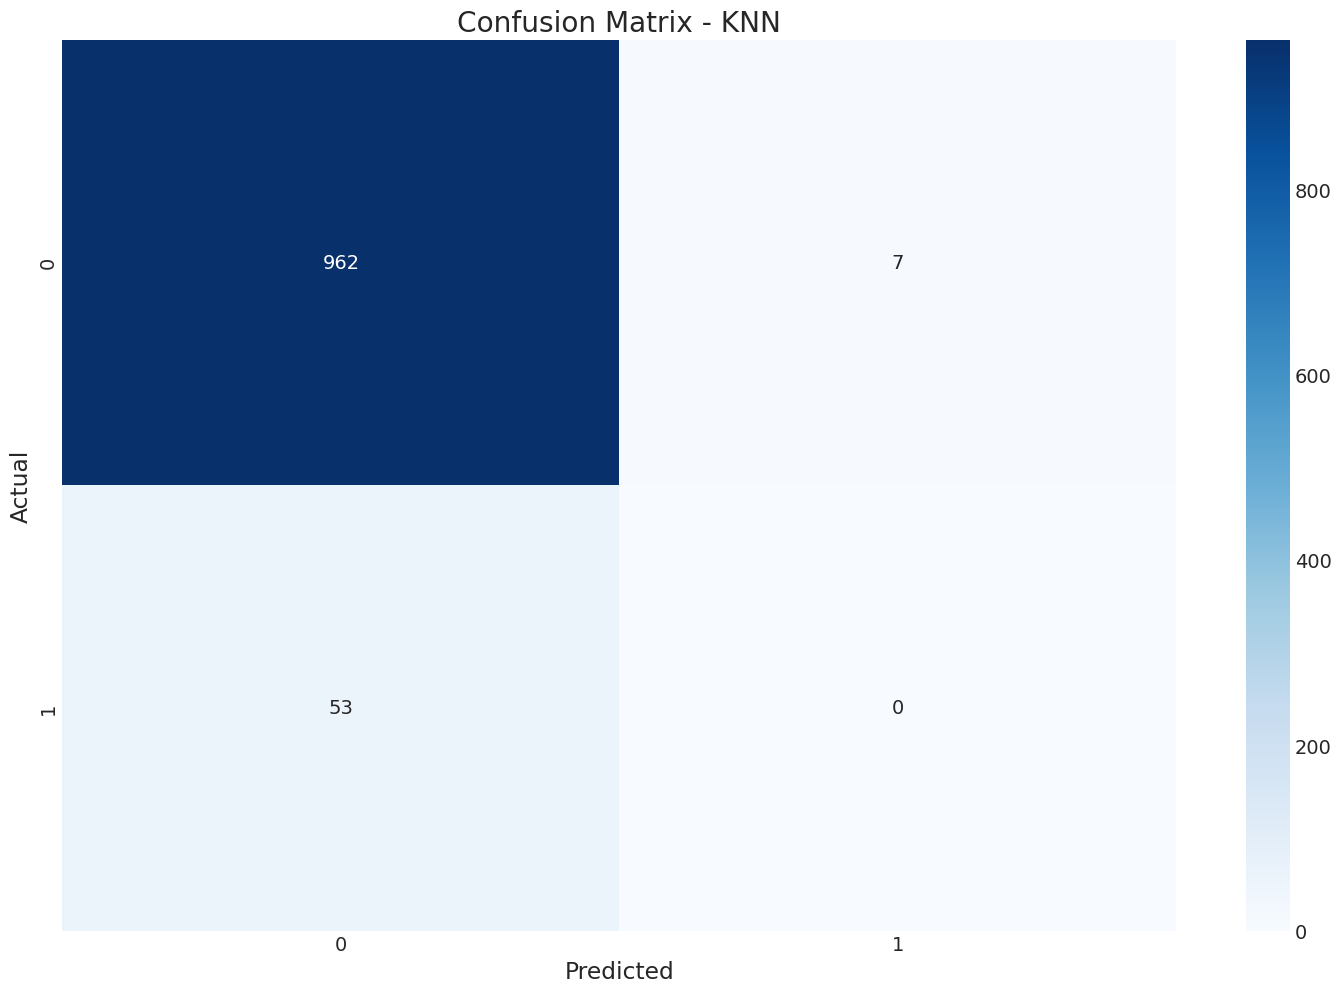

In [124]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(Y_test, Y_pred_NB)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for KNN
cm_knn = confusion_matrix(Y_test, Y_Res_KNN)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the scores for Naive Bayes
accuracy_nb = accuracy_score(Y_test, Y_pred_NB)
precision_nb = precision_score(Y_test, Y_pred_NB)
recall_nb = recall_score(Y_test, Y_pred_NB)
f1_nb = f1_score(Y_test, Y_pred_NB)

print("Naive Bayes:")
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

# Calculate the scores for KNN
accuracy_knn = accuracy_score(Y_test, Y_Res_KNN)
precision_knn = precision_score(Y_test, Y_Res_KNN)
recall_knn = recall_score(Y_test, Y_Res_KNN)
f1_knn = f1_score(Y_test, Y_Res_KNN)

print("\nKNN:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Naive Bayes:
Accuracy: 0.8669275929549902
Precision: 0.18796992481203006
Recall: 0.4716981132075472
F1 Score: 0.26881720430107525

KNN:
Accuracy: 0.9412915851272016
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [ ]:
A = {'Models' : ['Gaussian Naive Bayes','K Nearest Neighbors'],
     'AUC Scores' :[roc_auc_score(Y_test, y_score_NB),
                     roc_auc_score(Y_test, y_score_KNN)]}
A = pd.DataFrame(A)
A

,Models,AUC Scores
0,Gaussian Naive Bayes,0.854898
1,K Nearest Neighbors,0.691240


Receiver Operating Characteristic

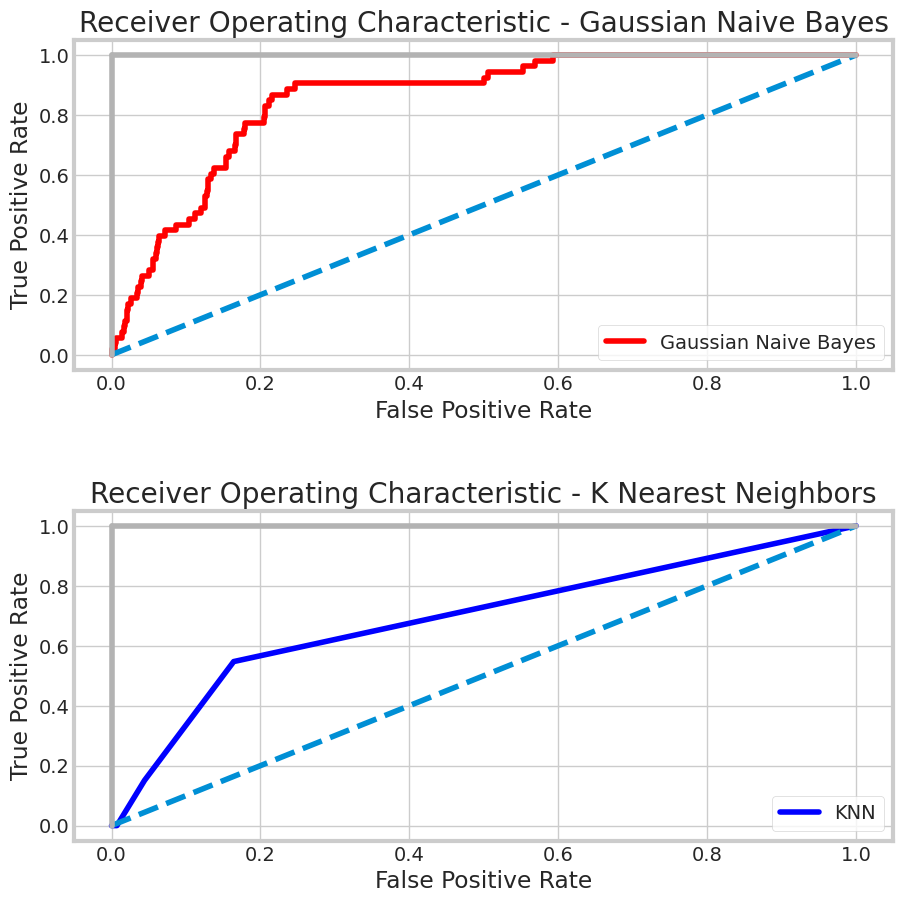

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)

# Gaussian Naive Bayes
ax[0].set_title('Receiver Operating Characteristic - Gaussian Naive Bayes')
ax[0].plot(false_positive_rate1, true_positive_rate1, color='red', label='Gaussian Naive Bayes')
ax[0].legend()
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0], c=".7")
ax[0].plot([1, 1], c=".7")
ax[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')


# K Nearest Neighbors
ax[1].set_title('Receiver Operating Characteristic - K Nearest Neighbors')
ax[1].plot(false_positive_rate4, true_positive_rate4, color='blue', label='KNN')
ax[1].legend()
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0], c=".7")
ax[1].plot([1, 1], c=".7")
ax[1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

fig.tight_layout(pad=3.0)
plt.show()

Comparison of ROC Curves

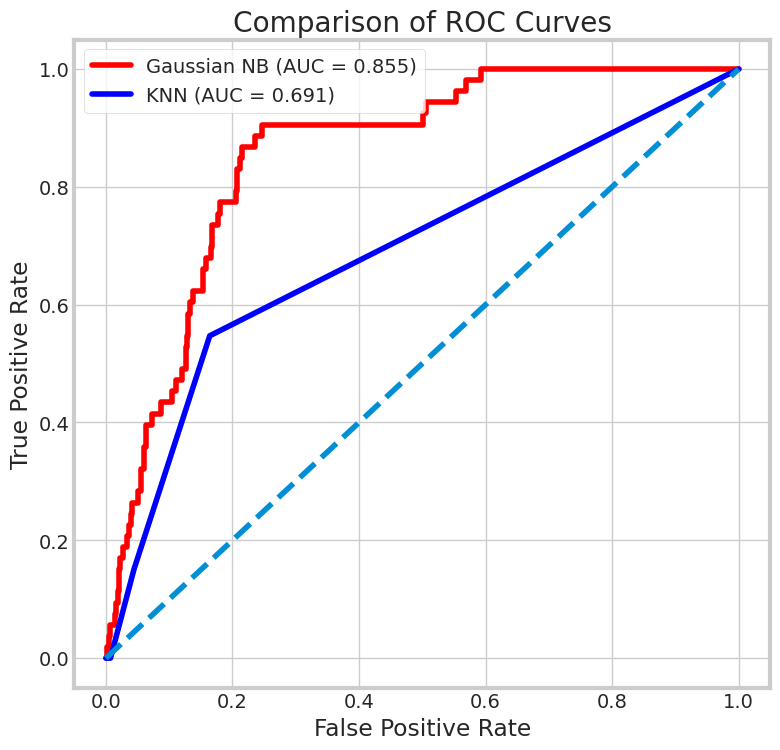

In [ ]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=105)

# Train and evaluate Naive Bayes
NB = GaussianNB()
NB.fit(X_train, Y_train)
y_score_NB = NB.predict_proba(X_test)[:, 1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score_NB)
NB_auc_score = roc_auc_score(Y_test, y_score_NB)

# Train and evaluate KNN
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, Y_train)
y_score_KNN = KNN_clf.predict_proba(X_test)[:, 1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, y_score_KNN)
KNN_auc_score = roc_auc_score(Y_test, y_score_KNN)

# Plot ROC curves for Naive Bayes and KNN
plt.figure(figsize=(8, 8))
plt.title('Comparison of ROC Curves')
plt.plot(false_positive_rate1, true_positive_rate1, color='red', label=f'Gaussian NB (AUC = {NB_auc_score:.3f})')
plt.plot(false_positive_rate4, true_positive_rate4, color='blue', label=f'KNN (AUC = {KNN_auc_score:.3f})')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Dataset Source:** kaggle.com/code/saumyagupta2025 stroke-prediction-detailed-eda-7-ml-models/input?select=healthcare-dataset-stroke-data.csv